## Notebook Content

In this notebook, visualization for the most frequent word and data vectorization

## Import Libraries

In [1]:
import nltk
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
import pickle
import matplotlib.pyplot as plt

### Methods to Use Amoung File

In [2]:
def read_pickle(file_name):
    """This method is to read the passed file name"""
    with open(file_name , 'rb') as handle:
        return pickle.load(handle)

In [3]:
def get_freq_word(TEXT_list):
    """This method get count the frequency of each word in the passed parameter"""
    Vocab_list = ' '.join(TEXT_list)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

In [4]:
def write_pickle(file_name, df_to_write):
    """This method is to save the passed dataframe as a pickle file with the passed name"""
    with open(file_name, 'wb') as handle:
        pickle.dump(df_to_write, handle, protocol = pickle.HIGHEST_PROTOCOL)

### Read Datasets from pickle

In [5]:
df1 = read_pickle('df_1_after_cleaning.pickle')
df2 = read_pickle('df_2_after_cleaning.pickle')

In [6]:
data = pd.concat([df1,df2], ignore_index = True)

### Data Visualisation 

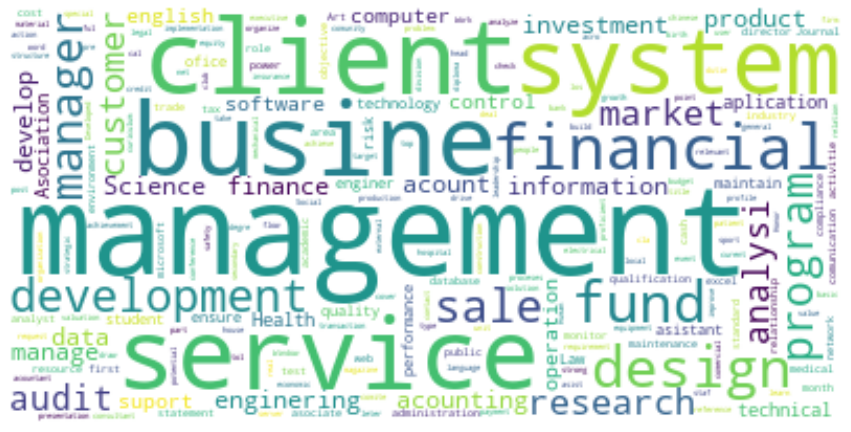

In [7]:
All_text = list(data.TEXT)
All_text = " ".join(All_text)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

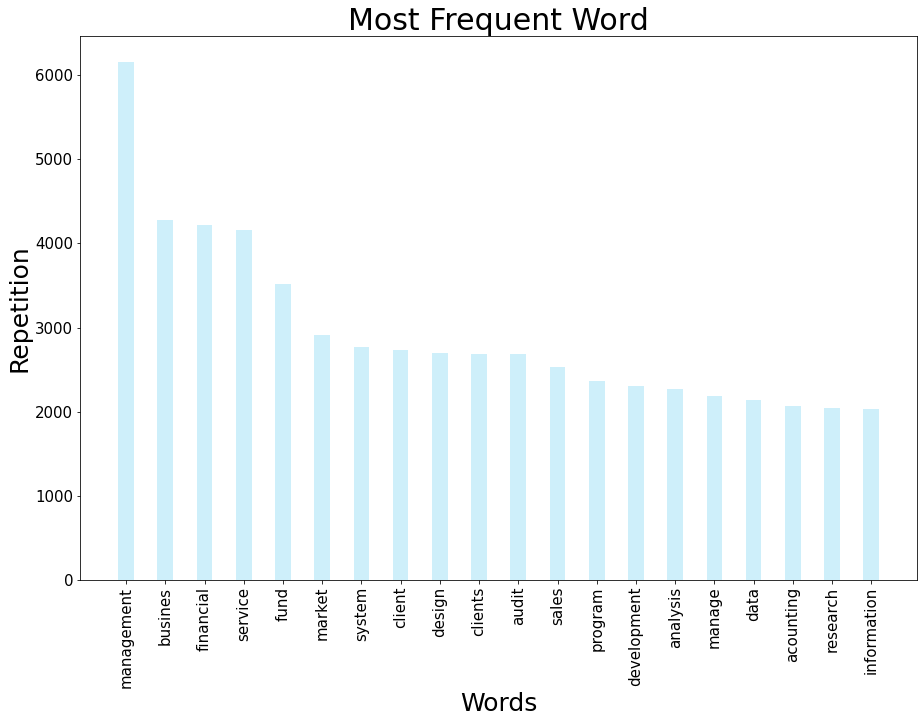

In [8]:
freq_words = get_freq_word(data.TEXT)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

### Data Vectorization

#### Count Vectorizer Without grams

In [9]:
cv1 = CountVectorizer(stop_words='english')
after_cv1 = cv1.fit_transform(data.TEXT)
cv1_df = pd.DataFrame(after_cv1.toarray(), columns=cv1.get_feature_names()).head()
cv1_df

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aacademic,aaditeshwar,aakruti,aan,aardvark,aaron,aashish,aba,ababa,abac,...,zwart,zwischen,zwitserlot,zxy,zycosoil,zydus,zyh,zymetry,zyngchen,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Count Vectorizer With grams

In [10]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

after_cv2 = cv2.fit_transform(data.TEXT)
cv2_df = pd.DataFrame(after_cv2.toarray(), columns=cv2.get_feature_names()).head()
cv2_df

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aacademic,aacademic tutor,aaditeshwar,aaditeshwar seth,aakruti,aakruti kalepadal,aan,aan acomplished,aardvark,aardvark mesa,...,zydus,zydus hospital,zyh,zyh stern,zymetry,zymetry factory,zyngchen,zyngchen advice,zyrtec,zyrtec comercials
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Vectorizer Without grams

In [11]:
tfidf = TfidfVectorizer(stop_words='english')
doc_words = tfidf.fit_transform(data.TEXT)
tfidf_df = pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names())
tfidf_df

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aacademic,aaditeshwar,aakruti,aan,aardvark,aaron,aashish,aba,ababa,abac,...,zwart,zwischen,zwitserlot,zxy,zycosoil,zydus,zyh,zymetry,zyngchen,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF Vectorizer With grams

In [12]:
tfidf2 = TfidfVectorizer(  binary=True, stop_words='english')
doc_words2 = tfidf2.fit_transform(data.TEXT)
tfidf2_df = pd.DataFrame(doc_words2.toarray(),columns=tfidf2.get_feature_names())
tfidf2_df

/Users/shahadsulaiman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aacademic,aaditeshwar,aakruti,aan,aardvark,aaron,aashish,aba,ababa,abac,...,zwart,zwischen,zwitserlot,zxy,zycosoil,zydus,zyh,zymetry,zyngchen,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Store Them Into Pickle

In [13]:
write_pickle('Count_Vectorizer_Without_grams.pickle', cv1_df)
write_pickle('Count_Vectorizer_With_grams.pickle', cv2_df)
write_pickle('TF-IDF_Vectorizer_Without_grams.pickle', tfidf_df)
write_pickle('TF-IDF_Vectorizer_With_grams.pickle', tfidf2_df)